In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [75]:
dataset = pd.read_csv('CAR DETAILS.csv')
dataset.head(5)

,name,Brand Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [76]:
dataset.shape

(4340, 9)

In [77]:
dataset.dtypes

name             object
Brand Name       object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [78]:
dataset.columns

Index(['name', 'Brand Name ', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [79]:
dataset.isnull().sum()

name             0
Brand Name       0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [80]:
dataset.duplicated().value_counts()


False    3577
True      763
Name: count, dtype: int64

In [81]:
dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [82]:
dataset2 = dataset.copy()

In [83]:
dataset2.drop_duplicates(inplace= True)
dataset2.shape

(3577, 9)

In [84]:
dataset2.duplicated().sum()

np.int64(0)

In [85]:
dataset2.head()

,name,Brand Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [86]:
dataset2.drop('name', axis = 1, inplace= True)
dataset2.head()

,Brand Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [87]:
dataset2.dtypes

Brand Name       object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [88]:
cat_cols = dataset2.dtypes[dataset2.dtypes=='object'].index
num_cols = dataset2.dtypes[dataset2.dtypes=='int64'].index

In [89]:
print(cat_cols)
print(num_cols)

Index(['Brand Name ', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Index(['year', 'selling_price', 'km_driven'], dtype='object')


In [91]:
for i in num_cols:
    print(f'Feature: {i} | Unique_count : {dataset2[i].nunique()}')

Feature: year | Unique_count : 27
Feature: selling_price | Unique_count : 445
Feature: km_driven | Unique_count : 770


#### Finding correlation

In [93]:
corr = dataset2[num_cols].corr()
corr

,year,selling_price,km_driven
year,1.00000,0.424260,-0.417490
selling_price,0.42426,1.000000,-0.187359
km_driven,-0.41749,-0.187359,1.000000


In [96]:
#### Finding Outliers and Treating them..

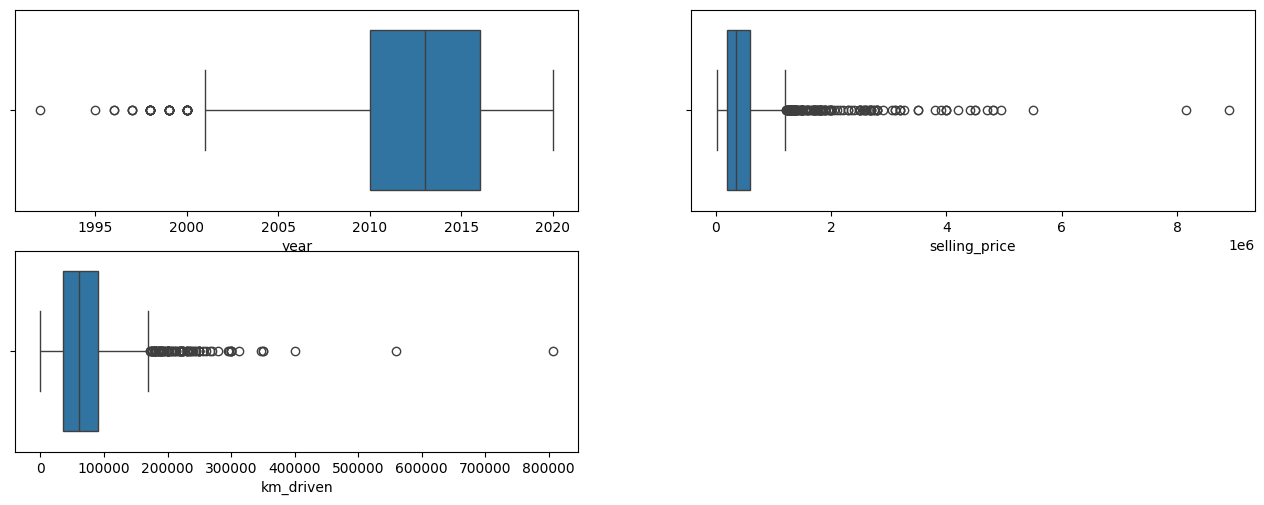

In [97]:
plt.figure(figsize=(16,12))
for i in range(len(num_cols)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x= dataset2[num_cols[i]])
plt.show()

In [98]:
a = dataset2[['selling_price','km_driven']].describe(percentiles= [0.01,0.02,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,97%,98%,99%,max
selling_price,20000.0,51786.64,60000.0,80000.0,350000.0,1200000.0,1497200.0,1800000.0,2675000.0,8900000.0
km_driven,1.0,1744.08,5000.0,10000.0,60000.0,149534.8,170000.0,193440.0,223158.4,806599.0


In [99]:
dataset2['selling_price'] = np.where(dataset2['selling_price']>1800000.0,1800000.0,dataset2['selling_price'])
dataset2['km_driven'] = np.where(dataset2['km_driven']>193440.0,193440.0,dataset2['km_driven'])

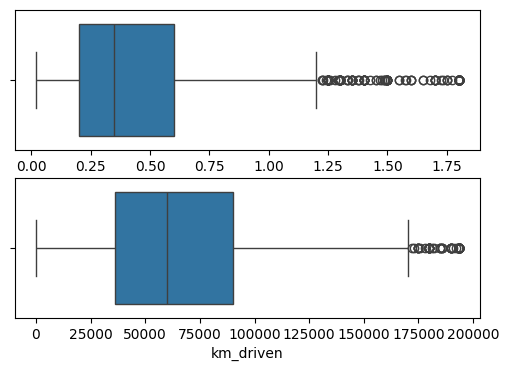

In [100]:
cols2 = ['selling_price','km_driven']
plt.figure(figsize=(6,4))
for i in range(len(cols2)):
    plt.subplot(2,1,i+1)
    sns.boxplot(x= dataset2[cols2[i]])
plt.show()

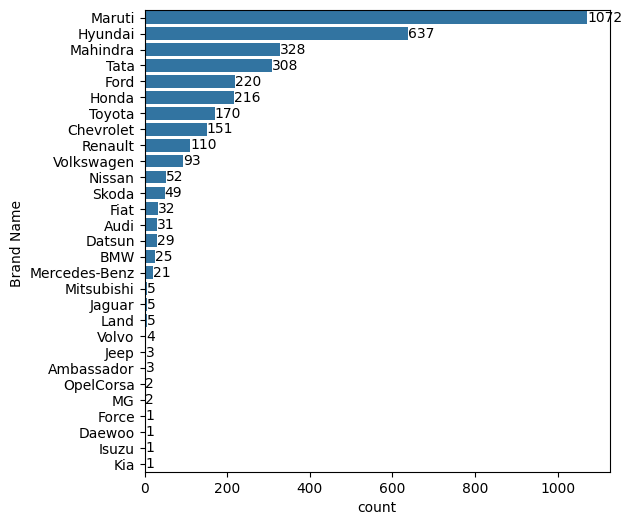

In [101]:
plt.figure(figsize=(6,6))
ax1 = sns.countplot(y = dataset2['Brand Name '],
                    order = dataset2['Brand Name '].value_counts().sort_values(ascending= False).index)
ax1.bar_label(ax1.containers[0])
plt.show()

In [146]:
for i in cat_cols:
    print(f'Feature: {i} | Unique_count : {dataset2[i].nunique()}')

Feature: Brand Name  | Unique_count : 11
Feature: fuel | Unique_count : 5
Feature: seller_type | Unique_count : 3
Feature: transmission | Unique_count : 2
Feature: owner | Unique_count : 5


In [102]:
dataset2['Brand Name '].nunique()

29

In [103]:
dataset2['Brand Name '].value_counts()

Brand Name 
Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Mitsubishi          5
Jaguar              5
Land                5
Volvo               4
Jeep                3
Ambassador          3
OpelCorsa           2
MG                  2
Force               1
Daewoo              1
Isuzu               1
Kia                 1
Name: count, dtype: int64

In [104]:
dataset2['Brand Name ']= dataset2['Brand Name '].replace(['Mitsubishi','Jaguar','Land','Volvo',
                                                          'Jeep','Ambassador','OpelCorsa','Force','Daewoo',
                                                          'Isuzu','Kia','MG','Mercedes-Benz','Fiat','Datsun',
                                                          'BMW','Audi','Nissan','Skoda'],'Others')

In [105]:
dataset2['Brand Name '].value_counts()

Brand Name 
Maruti        1072
Hyundai        637
Mahindra       328
Tata           308
Others         272
Ford           220
Honda          216
Toyota         170
Chevrolet      151
Renault        110
Volkswagen      93
Name: count, dtype: int64

In [106]:
for i in cat_cols:
    print(i,dataset2[i].nunique())

Brand Name  11
fuel 5
seller_type 3
transmission 2
owner 5


In [109]:
dataset2['fuel'].value_counts()

fuel
Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64

In [110]:
dataset2['seller_type'].value_counts()

seller_type
Individual          2832
Dealer               712
Trustmark Dealer      33
Name: count, dtype: int64

In [111]:
dataset2['transmission'].value_counts()

transmission
Manual       3265
Automatic     312
Name: count, dtype: int64

In [112]:
dataset2['owner'].value_counts()

owner
First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: count, dtype: int64

#### Using label encoder for the Categorical columns

In [147]:
from sklearn.preprocessing import LabelEncoder
Lb_enc = LabelEncoder()

In [148]:
for i in cat_cols:
    dataset2[i] = Lb_enc.fit_transform(dataset2[i])

Selecting X and Y values

In [116]:
x = dataset2.drop('selling_price',axis = 1)
y = dataset2['selling_price']
print(x.shape)
print(y.shape)

(3577, 7)
(3577,)


Splitting the data into training and testing

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.30,random_state= 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2503, 7)
(1074, 7)
(2503,)
(1074,)


Model evalution matrics

In [119]:
from sklearn.metrics import *

In [120]:
def model_eval(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)

    MAE = mean_absolute_error(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(MSE)

    data = {'Train_r2':train_r2 , 'Test_r2':test_r2 ,'Mean_abs_error':MAE ,'Mean_sq_err': MSE, 'Root_mse':RMSE}
    result = pd.DataFrame(data,index= [mname] )
    return result



In [121]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, RandomForestRegressor


1. Linear Regression


In [122]:
lr = LinearRegression()
lr_result = model_eval(lr,x_train,y_train,x_test,y_test,'Linear Regression')
lr_result

,Train_r2,Test_r2,Mean_abs_error,Mean_sq_err,Root_mse
Linear Regression,0.529665,0.569068,175576.768167,5.736803e+10,239516.2456


2. Ridge Regression


In [123]:
rid = Ridge(alpha= 7)
rid_result = model_eval(rid,x_train,y_train,x_test,y_test,'Ridge Regression')
rid_result

,Train_r2,Test_r2,Mean_abs_error,Mean_sq_err,Root_mse
Ridge Regression,0.529475,0.568439,175584.055371,5.745176e+10,239690.971808


3. Lasso Regression


In [124]:
lass = Lasso(alpha= 9)
lass_result = model_eval(lass,x_train,y_train,x_test,y_test,'Lasso Regression')
lass_result

,Train_r2,Test_r2,Mean_abs_error,Mean_sq_err,Root_mse
Lasso Regression,0.529665,0.569064,175576.1325,5.736845e+10,239517.115495


4. Decision Tree Regressor


In [125]:
dt = DecisionTreeRegressor(max_depth = 12, min_samples_split= 20)
dt_result = model_eval(dt,x_train,y_train,x_test,y_test,'Decision Tree Regression')
dt_result

,Train_r2,Test_r2,Mean_abs_error,Mean_sq_err,Root_mse
Decision Tree Regression,0.800632,0.61439,139416.521556,5.133450e+10,226571.187001


5. KNN regressor


In [126]:
knn = KNeighborsRegressor(n_neighbors=3)
knn_result = model_eval(knn,x_train,y_train,x_test,y_test,'KNN Regression')
knn_result

,Train_r2,Test_r2,Mean_abs_error,Mean_sq_err,Root_mse
KNN Regression,0.591444,0.184959,217855.848231,1.085026e+11,329397.385415


6. AdaBoost regressor


In [127]:
ada = AdaBoostRegressor(n_estimators = 100)
ada_result = model_eval(ada,x_train,y_train,x_test,y_test,'AdaBoost Regression')
ada_result

,Train_r2,Test_r2,Mean_abs_error,Mean_sq_err,Root_mse
AdaBoost Regression,0.546133,0.560377,194238.006452,5.852493e+10,241919.267349


7. Random Forest 


In [128]:
ran_fo = RandomForestRegressor(n_estimators= 100, max_depth=9, min_samples_split=25)
ran_result = model_eval(ran_fo,x_train,y_train,x_test,y_test,'Random Forest Regression')
ran_result

,Train_r2,Test_r2,Mean_abs_error,Mean_sq_err,Root_mse
Random Forest Regression,0.763661,0.728749,129439.902532,3.611034e+10,190027.204037


8. Bagging regressor

In [129]:
bagg = BaggingRegressor(n_estimators= 100, max_features= x_train.shape[1], max_samples = x_train.shape[0])
bagg_result = model_eval(bagg,x_train,y_train,x_test,y_test,'Bagging Regression')
bagg_result

,Train_r2,Test_r2,Mean_abs_error,Mean_sq_err,Root_mse
Bagging Regression,0.9395,0.710937,132352.361096,3.848159e+10,196167.247414


In [130]:
Final_result = pd.concat([bagg_result,ran_result,ada_result,knn_result,dt_result,lr_result,lass_result,rid_result])
Final_result

,Train_r2,Test_r2,Mean_abs_error,Mean_sq_err,Root_mse
Bagging Regression,0.939500,0.710937,132352.361096,3.848159e+10,196167.247414
Random Forest Regression,0.763661,0.728749,129439.902532,3.611034e+10,190027.204037
AdaBoost Regression,0.546133,0.560377,194238.006452,5.852493e+10,241919.267349
KNN Regression,0.591444,0.184959,217855.848231,1.085026e+11,329397.385415
Decision Tree Regression,0.800632,0.614390,139416.521556,5.133450e+10,226571.187001
Linear Regression,0.529665,0.569068,175576.768167,5.736803e+10,239516.245600
Lasso Regression,0.529665,0.569064,175576.132500,5.736845e+10,239517.115495
Ridge Regression,0.529475,0.568439,175584.055371,5.745176e+10,239690.971808


Saving the best model using PICKLE

In [131]:
import pickle

In [132]:
pickle.dump(ran_fo,open('Random_forest.pkl','wb'))
pickle.dump(ada,open('Ada_boost.pkl','wb'))

In [134]:
dataset2_sample = dataset2.sample(n=20, random_state= 42)
dataset2_sample

,Brand Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1045,5,2018,270000.0,20000.0,4,1,1,0
3194,5,2017,525000.0,39000.0,4,0,1,0
1530,9,2016,990000.0,146000.0,1,0,1,0
553,6,2018,1800000.0,10000.0,1,0,0,0
1612,2,2007,229999.0,70000.0,4,1,1,2
2652,4,2010,325000.0,120000.0,1,1,1,4
152,3,2008,210000.0,53772.0,4,1,1,0
3985,6,2016,500000.0,35000.0,1,1,1,0
1059,2,2018,790000.0,19571.0,1,0,1,0
3788,2,2015,360000.0,80000.0,4,1,1,2


In [150]:
dataset2_sample.to_csv('dataset2_sample.csv')

In [135]:
x = dataset2_sample.drop('selling_price', axis = 1)
y = dataset2_sample['selling_price']
print(x.shape)
print(y.shape)

(20, 7)
(20,)


In [136]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x,y, test_size= 0.10,random_state=42)
print(x2_test.shape)
print(x2_train.shape)
print(y2_test.shape)
print(y2_train.shape)


(2, 7)
(18, 7)
(2,)
(18,)


In [137]:
Loaded_model = pickle.load(open('Random_forest.pkl','rb'))

In [138]:
Model_sco = model_eval(Loaded_model, x2_train, y2_train, x2_test, y2_test, 'Loaded Model')
Model_sco

,Train_r2,Test_r2,Mean_abs_error,Mean_sq_err,Root_mse
Loaded Model,-0.00008,-0.034501,265000.0,7.264784e+10,269532.629209
